<a href="https://colab.research.google.com/github/Sri99182/Project-S/blob/Sridevi/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vasikarlasridevi","key":"2cc54dce6a8cf43db757d49a554fabf5"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets list

ref                                                          title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
haseebindata/student-performance-predictions                 Student Performance Predictions                     9KB  2024-08-17 06:57:57           8709        192  0.9411765        
lainguyn123/student-performance-factors                      Student Performance Factors                        94KB  2024-09-02 10:53:57           2357         55  1.0              
abdullah0a/human-age-prediction-synthetic-dataset            Human Age Prediction Synthetic Dataset            739KB  2024-09-04 07:25:39           1348         26  1.0              
krupalpatel07/pepsico-daily-data                             PEPSICO Daily Data      

In [7]:
!kaggle datasets download -d ankitkr60/advertisement-and-sales-data-for-analysis

Dataset URL: https://www.kaggle.com/datasets/ankitkr60/advertisement-and-sales-data-for-analysis
License(s): CC0-1.0
  0% 0.00/2.21k [00:00<?, ?B/s]
100% 2.21k/2.21k [00:00<00:00, 5.38MB/s]


In [8]:
!unzip /content/advertisement-and-sales-data-for-analysis.zip

Archive:  /content/advertisement-and-sales-data-for-analysis.zip
  inflating: Advertising And Sales.csv  


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import linprog

# Importing dataset
dataset = pd.read_csv("/content/Advertising And Sales.csv")
dataset

# Summary Statistics
print(dataset.iloc[:, 1:].describe())

               TV      Radio   Newspaper     Sales
count  200.000000  200.00000  200.000000  200.0000
mean   147.032500   23.28950   30.554000   14.0380
std     85.885186   14.86997   21.778621    5.2094
min      0.700000    0.00000    0.300000    1.6000
25%     74.375000   10.07500   12.750000   10.4000
50%    149.750000   22.90000   25.750000   12.9000
75%    218.825000   36.52500   45.100000   17.4000
max    296.400000   49.60000  114.000000   27.0000


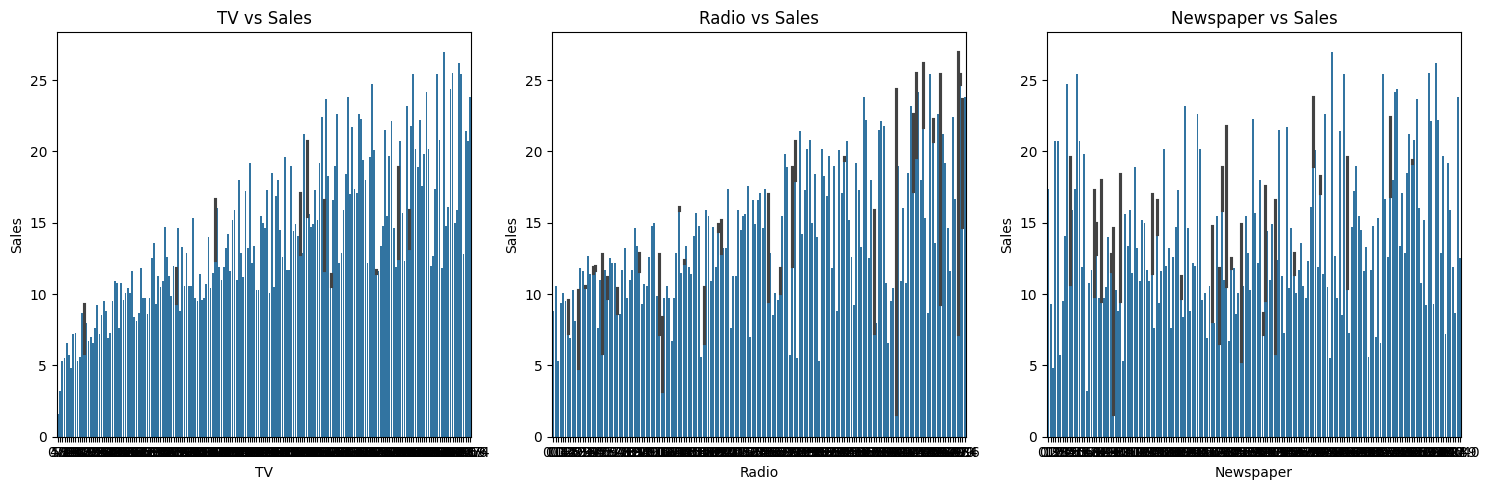

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a barplot for each variable
sns.barplot(x='TV', y='Sales', data=dataset, ax=axes[0])
sns.barplot(x='Radio', y='Sales', data=dataset, ax=axes[1])
sns.barplot(x='Newspaper', y='Sales', data=dataset, ax=axes[2])

# Set titles for each subplot
axes[0].set_title('TV vs Sales')
axes[1].set_title('Radio vs Sales')
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

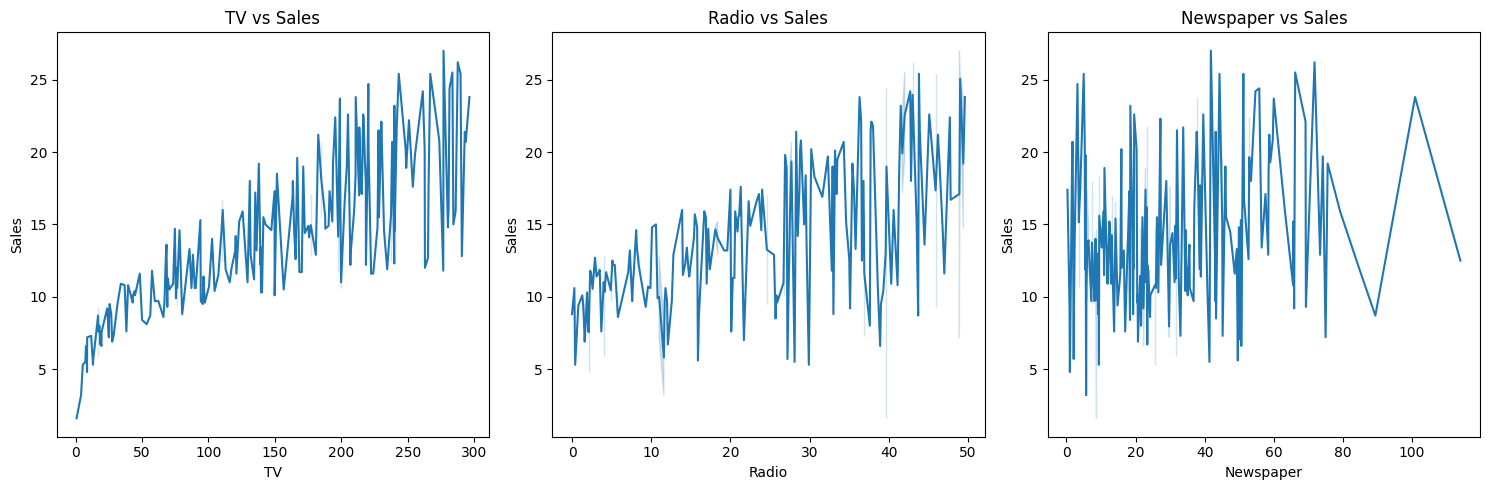

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a lineplot for each variable
sns.lineplot(x='TV', y='Sales', data=dataset, ax=axes[0])
sns.lineplot(x='Radio', y='Sales', data=dataset, ax=axes[1])
sns.lineplot(x='Newspaper', y='Sales', data=dataset, ax=axes[2])

# Set titles for each subplot
axes[0].set_title('TV vs Sales')
axes[1].set_title('Radio vs Sales')
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


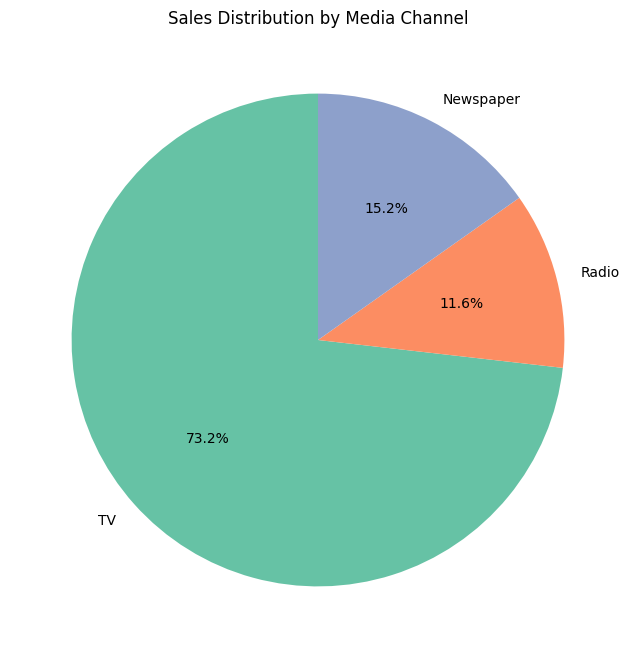

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summarizing the data by calculating the total sales for each variable
tv_sales_sum = dataset['TV'].sum()
radio_sales_sum = dataset['Radio'].sum()
newspaper_sales_sum = dataset['Newspaper'].sum()

# Data for pie chart
sales_sums = [tv_sales_sum, radio_sales_sum, newspaper_sales_sum]
labels = ['TV', 'Radio', 'Newspaper']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_sums, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Sales Distribution by Media Channel')

plt.show()